<a href="https://colab.research.google.com/github/Blackcipher101/ASL-detector/blob/main/ASLdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [3]:
import json
token = {"username":"nehalnevle","key":"f56fbefc794d7437f2952910cd1d058d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08            863  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20            456  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59             79  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43            631  
christianlillelund/don

In [9]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip '/content/datasets/datamunge/sign-language-mnist/*.zip' 

Archive:  /content/datasets/datamunge/sign-language-mnist/sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign3.png          
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: american_sign_language.PNG  
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     
replace sign_mnist_test/sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test/sign_mnist_test.csv  
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    
replace sign_mnist_train/sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [116]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
train = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [118]:
labels = train['label'].values

In [119]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [120]:
train.drop('label', axis = 1, inplace = True)

In [121]:
IMAGE_RES = 224

In [135]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
#images = np.array([i.flatten() for i in images])

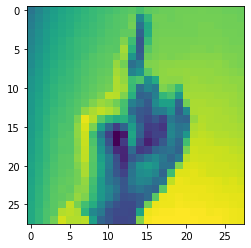

In [136]:
plt.imshow(images[0].reshape(28,28))

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [139]:
x_train = x_train / 255
x_test = x_test / 255

In [140]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [141]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [157]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24,activation = 'softmax')
])

In [158]:
batch_size = 128
num_classes = 24
epochs = 50

In [159]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 64)        

In [161]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 1s 8ms/step - loss: 2.0913 - accuracy: 0.3728 - val_loss: 0.7045 - val_accuracy: 0.7846
Epoch 2/50
151/151 [==============================] - 1s 6ms/step - loss: 0.5162 - accuracy: 0.8282 - val_loss: 0.2416 - val_accuracy: 0.9376
Epoch 3/50
151/151 [==============================] - 1s 6ms/step - loss: 0.2244 - accuracy: 0.9295 - val_loss: 0.0908 - val_accuracy: 0.9806
Epoch 4/50
151/151 [==============================] - 1s 6ms/step - loss: 0.1147 - accuracy: 0.9652 - val_loss: 0.0332 - val_accuracy: 0.9972
Epoch 5/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0697 - accuracy: 0.9808 - val_loss: 0.0177 - val_accuracy: 0.9992
Epoch 6/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0515 - accuracy: 0.9849 - val_loss: 0.0091 - val_accuracy: 0.9998
Epoch 7/50
151/151 [==============================] - 1s 6ms/step - loss: 0.0345 - accuracy: 0.9909 - val_loss: 0.0141 - val_accuracy: 0.9972
Epoch 

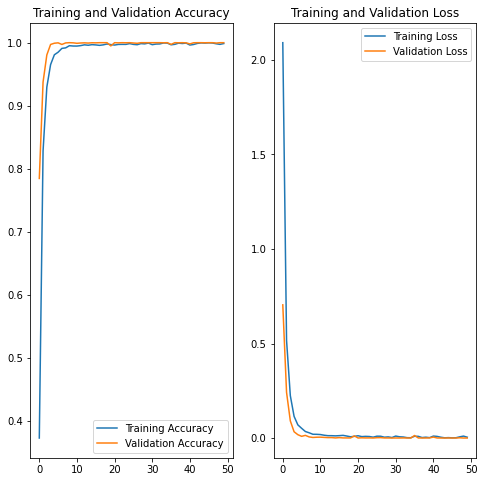

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [167]:
test_labels = test['label']

In [168]:
test.drop('label', axis = 1, inplace = True)

In [170]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
#test_images = np.array([i.flatten() for i in test_images])

In [171]:
test_labels = label_binrizer.fit_transform(test_labels)

In [172]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [174]:
y_pred = model.predict(test_images)

In [175]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy_score(test_labels, y_pred.round())

0.9556609035136643